# Expected value and the gradient of parameters
In this example, we show how to calculate the expected value of a parameterized quantum circuit and the way to extract the graident of each parameters via Ted-Q module and pyTorch module

In [1]:
import tedq as qai
import torch
import numpy as np

In [2]:
n_qubits=3

### Circuit definition

In [3]:
def circuitDef(theta):
    # Circuit
    qai.RX(theta[0], qubits=[0])
    qai.RY(theta[1], qubits=[1])
    qai.RZ(theta[2], qubits=[2])
    
    qai.CNOT(qubits=[0, 1])
    qai.CNOT(qubits=[1, 2])
    qai.CNOT(qubits=[2, 0])
    
    # Measurement
    for idx in range(n_qubits):
        qai.measurement.expval(qai.PauliZ(qubits=[idx]))

### Parse the circuit

In [4]:
circuit = qai.Circuit(circuitDef, n_qubits, torch.rand(n_qubits))

### Draw the circuit

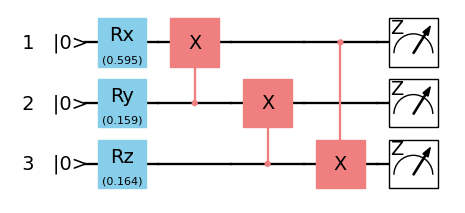

In [5]:
drawer = qai.matplotlib_drawer(circuit, dpi=100, figsize=(5,6))
drawer.full_draw()

### Compile the circuit

In [6]:
my_compilecircuit = circuit.compilecircuit(backend="pytorch" )

log10(flops) of this quantum circuit:   2.380211241711787


### init the parameters

In [7]:
params = torch.rand(n_qubits, requires_grad=True)

### calculate the expected value of the circuit

In [8]:
exp_val = my_compilecircuit(params)

### calculate the gradient

In [9]:
optimizer = torch.optim.Adam([params], lr=0.5)
loss = torch.nn.MSELoss(reduction='mean')
l = loss(exp_val, torch.Tensor([0, 1, 1]))
l.backward()

### Print the result

In [10]:
print("Initial parameters: ", params)
print("Expected value from circuit: ", exp_val)
print("Gradient of parameters", params.grad)

Initial parameters:  tensor([0.1221, 0.3341, 0.5405], requires_grad=True)
Expected value from circuit:  tensor([0.9447, 0.9377, 0.9377], grad_fn=<StackBackward0>)
Gradient of parameters tensor([ 0.0096, -0.1795,  0.0000])
